### Introduction/Business Problem 
******************

An upstart Information Technology company has grown rapidly and is looking to move into an office space that will serve as it's Headquarters. The company would like to identify metropolitan areas in North Carolina, Virgina, Georgia, and South Carolina as possible location candidates. As they are an upstart company, they would like to convey a modern and trendy business environment, as a possible draw for potential candidates for hire. The ideal location would be comparable to and offer similar talent pools, economic demographics and surrounding amenities as San Jose, California which is home to the largest tech hub in the United States.

**Which metropolitan areas in North Carolina, Virgina, Georgia and South Carolina are most comparable to San Jose California?**

### Data Strategy  
******************

___FourSquare Location data___ <br/> 
FourSquare location data will be used to identify Types of Venues in the surrounding areas for San Jose and all the potential locations. Venue information will also serve as independent variables in the comparison analysis. Venue information will include entertainment, leisure, potential rental/living space and educational institutions. 

___Demographic Data___ <br/> 
Census Data describing the socio-economic demographics of San Jose California, as well as, the potential Headquarter Location Sites. Pertinent data like avg per capita income, avg home price, median education level etc. will be used as independent variables in comparison analysis

___Additional Data Factors___ <br/> 
Local Crime Statistics and Business Property cost data will also be reviewed as potential contributing factors in determining whether any number of comparable potential locations is more suitable than the other. 


##### Data Review Process 
Identify potential locations within the proposed States <br/>
- Web-scrape Wikipedia data to identify possible location cities within the target States
- Compiling Demographic information like City Size, Population
- Identify other potential independent data points like Median income, Average Home Price, Average Education Level etc.

Compile similar demographic information for San Jose California <br/>
Identify and store potential Headquarter City/Location Coordinates <br/>
Identify San Jose Coordinates <br/>
Use FourSquare API to identify surrounding Venues like restaurants, universities, parks, etc. For Potential Locations and for San Jose control location. <br/>
Perform statistical review/analysis of the compiled information. <br/>
- Distributions of data
- Data Value Correlations
- Clean and Normalize data set

Perform Machine Learning clustering to identify potential locations comparable to San Jose California. <br/>
    


-------------------
-------------------

### Import Required Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import style
style.use('ggplot')

import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup # Library to handle html
from sklearn.cluster import KMeans
from sklearn import preprocessing
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import seaborn as sns
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.83 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  36.36 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  39.75 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  48.23 MB/s
Libraries imported.


### Demographic Data Collection
-----------------------------

##### Preparing Html Requests and Information Storage

Build a list of Wikipedia Links.  <br/>
Each link corresponds to the cities of comparison.  *(The Data Compilation Function will use these links fetch Wikipedia Data)*

In [2]:
SanJose_Link = 'https://en.wikipedia.org/wiki/San_Jose,_California'
PaloAlto_link = 'https://en.wikipedia.org/wiki/Palo_Alto,_California'
SantaClara_Link = 'https://en.wikipedia.org/wiki/Santa_Clara,_California'
Raleigh_Link = 'https://en.wikipedia.org/wiki/Raleigh,_North_Carolina'
Charlotte_Link = 'https://en.wikipedia.org/wiki/Charlotte,_North_Carolina'
Atlanta_Link = 'https://en.wikipedia.org/wiki/Atlanta'
Charleston_Link = 'https://en.wikipedia.org/wiki/Charleston,_South_Carolina'
Winston_Link = 'https://en.wikipedia.org/wiki/Winston-Salem,_North_Carolina'
Augusta_Link = 'https://en.wikipedia.org/wiki/Augusta,_Georgia'
Columbia_Link = 'https://en.wikipedia.org/wiki/Columbia,_South_Carolina'
Durham_Link = 'https://en.wikipedia.org/wiki/Durham,_North_Carolina'
Richmond_Link = 'https://en.wikipedia.org/wiki/Richmond,_Virginia'
Norfolk_Link = 'https://en.wikipedia.org/wiki/Norfolk,_Virginia'
Alexandria_Link = 'https://en.wikipedia.org/wiki/Alexandria,_Virginia'
Florence_Link = 'https://en.wikipedia.org/wiki/Florence,_South_Carolina'
Savannah_Link = 'https://en.wikipedia.org/wiki/Savannah,_Georgia'
Asheville_Link = 'https://en.wikipedia.org/wiki/Asheville,_North_Carolina'
Roanoke_Link = 'https://en.wikipedia.org/wiki/Roanoke,_Virginia'
Knoxville_Link = 'https://en.wikipedia.org/wiki/Knoxville,_Tennessee'
Greensboro_Link = 'https://en.wikipedia.org/wiki/Greensboro,_North_Carolina'
Cary_Link = 'https://en.wikipedia.org/wiki/Cary,_North_Carolina'
Athens_Link = 'https://en.wikipedia.org/wiki/Athens,_Georgia'
Albany_Link = 'https://en.wikipedia.org/wiki/Albany,_Georgia'
Chattanooga_Link = 'https://en.wikipedia.org/wiki/Chattanooga,_Tennessee'


links = [SanJose_Link, PaloAlto_link, SantaClara_Link, Raleigh_Link, Charlotte_Link, Atlanta_Link, Charleston_Link, 
         Winston_Link, Augusta_Link, Columbia_Link, Durham_Link, Richmond_Link, Norfolk_Link, Alexandria_Link, 
         Florence_Link, Savannah_Link, Asheville_Link, Roanoke_Link, Knoxville_Link, Greensboro_Link, Cary_Link, 
         Athens_Link, Albany_Link, Chattanooga_Link]

<br/>
Build a list of AreaVibes.com Links.  <br/>
Each link corresponds to the cities of comparison.  *(The Data Compilation Function will use these links fetch AreaVibe Data)*

In [3]:
sjcr = 'https://www.areavibes.com/san+jose-ca/'  
pacr = 'https://www.areavibes.com/palo+alto-ca/'
sccr = 'https://www.areavibes.com/santa+clara-ca/'    
ralcr = 'https://www.areavibes.com/raleigh-nc/'
chcr = 'https://www.areavibes.com/charlotte-nc/'    
atlcr = 'https://www.areavibes.com/atlanta-ga/'
chacr = 'https://www.areavibes.com/charleston-sc/'
wscr = 'https://www.areavibes.com/winston-salem-nc/'    
augcr = 'https://www.areavibes.com/augusta-ga/'
colcr = 'https://www.areavibes.com/columbia-sc/'    
durcr = 'https://www.areavibes.com/durham-nc/'
riccr = 'https://www.areavibes.com/richmond-va/'
norcr = 'https://www.areavibes.com/norfolk-va/'    
alexr = 'https://www.areavibes.com/alexandria-va/'
flor = 'https://www.areavibes.com/florence-sc/'
sav = 'https://www.areavibes.com/savannah-ga/'
ash = 'https://www.areavibes.com/asheville-nc/'
roan = 'https://www.areavibes.com/roanoke-va/'
knox = 'https://www.areavibes.com/knoxville-tn/'
gren = 'https://www.areavibes.com/greensboro-nc/'
car = 'https://www.areavibes.com/cary-nc/'
athn = 'https://www.areavibes.com/athens-ga/'
alby = 'https://www.areavibes.com/albany-ga/'
chat = 'https://www.areavibes.com/chattanooga-tn/'

crlinks = [sjcr,pacr,sccr,ralcr,chcr,atlcr,chacr,wscr,augcr,colcr,durcr,riccr,norcr,alexr,flor,sav,ash,roan,knox,gren,car,athn,alby,chat]


Create a list of city names with string slices from the Wikipedia hyperlink text included in the links list. <br/>
**Note:** This list is used through the data compilation to ensure informaiton is ordered properly, and to serve as a reference for a nested dictionary.
<br/><br/>
Create a nested list of city names using the cities list. <br/>
**Note:** This list is used to store compiled information for ease of passing to a dataframe.

In [4]:
# This list will server as a reference list for a dictionary of request data and help maintain a sequential order for processing data 
cities = []
for i in range(len(links)):
    if links[i].find(',_') ==-1:
        cities.append(links[i][(links[i].find('wiki/')+5):])
    else:
        x = links[i][(links[i].find('wiki/')+5):]
        cities.append((x[:x.find(',_')]).replace('_', ' ').replace('-', ' '))        
print('Cities List:',cities)

# Create a Nested list that will serve as a final stagfing area to house data piror to creating a data frame for analysis
citiesNested = []
for i in range(len(links)):
    if links[i].find(',_') ==-1:
        citiesNested.append([links[i][(links[i].find('wiki/')+5):],])
    else:
        x = links[i][(links[i].find('wiki/')+5):]
        citiesNested.append([(x[:x.find(',_')]).replace('_', ' ').replace('-', ' '),])
        
print('Nested List:', citiesNested)

Cities List: ['San Jose', 'Palo Alto', 'Santa Clara', 'Raleigh', 'Charlotte', 'Atlanta', 'Charleston', 'Winston Salem', 'Augusta', 'Columbia', 'Durham', 'Richmond', 'Norfolk', 'Alexandria', 'Florence', 'Savannah', 'Asheville', 'Roanoke', 'Knoxville', 'Greensboro', 'Cary', 'Athens', 'Albany', 'Chattanooga']
Nested List: [['San Jose'], ['Palo Alto'], ['Santa Clara'], ['Raleigh'], ['Charlotte'], ['Atlanta'], ['Charleston'], ['Winston Salem'], ['Augusta'], ['Columbia'], ['Durham'], ['Richmond'], ['Norfolk'], ['Alexandria'], ['Florence'], ['Savannah'], ['Asheville'], ['Roanoke'], ['Knoxville'], ['Greensboro'], ['Cary'], ['Athens'], ['Albany'], ['Chattanooga']]


### Capturing & Compiling Demographic Data
----------------------

**World Population Review US City Population Data:** Capture and Store Table Data <br/>
This table provides Area sqkm for each city

In [5]:
x = requests.get('http://worldpopulationreview.com/us-cities/')
cit = BeautifulSoup(x.text, 'lxml')
dentab = cit.find('table', {'class': 'table table-striped'}).find('tbody')
rws = dentab.find_all('tr')[2:]
df = []
for row in rws:
    cell = [i.text for i in row.find_all('td')]
    df.append(cell)

df1 = pd.DataFrame(df) 
df1.drop(0, axis=1, inplace=True)
df1.iat[118,0]=cities[8]

<br/>

**Wikipedia City Population Data & AreaVibes City Demographic Data**
<br/>
Build a Nested Dictionary with city names as the main dictionary key.
Each sub dictionary contains compiled Html Request information, with each having a defined key that corresponds to information gathered.

##### Dictionary Keys:#### 
Cities Names ['San Jose', 'Palo Alto', 'Santa Clara', 'Raleigh', 'Charlotte', 'Atlanta', 'Charleston', 'Winston Salem', 'Augusta', 'Columbia', 'Durham', 'Richmond', 'Norfolk', 'Alexandria', 'Florence', 'Savannah', 'Asheville', 'Roanoke', 'Knoxville', 'Greensboro', 'Cary', 'Athens', 'Albany', 'Chattanooga'] <br/>


##### Sub Dictionary Keys:

- **Html:** Stored request response - for record
- **Soup:** Stored Response Beautiful Soup Parsed Html - for record
- **Geo:** Latitude/Longitude from Soup Parsed Html - provides data values   -   (Latitude; Longitude)
- **Pop:** Wikipedia Population Table presented as a DataFrame - provides data values   -   (Estimated Population; Census Population 2010)
- **Crime:** AreaVibes Crime Table presented as a DataFrame - provides data values   -   (Crime/100k ppl; Violent Crime/100k; Property Crime/100k)
- **Housing:** AreaVibes Housing Table presented as a DataFrame   -   (Median Home Price; Median Rent Ask)
- **Income:** AreaVibes Income Table presented as a DataFrame   -   (Income per capita; Median household income; Unemployment rate; Poverty level)


In [6]:
# Build a nested dictionary to store City information and link request Data items 
d = []
for i in range(len(cities)):
    d.append({})  
nestDict = dict(zip(cities, d))

nestDict # show nestDict output for reference

# Create a loop to make and store html requests, parse html data with BS, store parsed city lat/long, and store a list of html table dataframes
# This Nested dictionary of site data will serve as a source of City Demographic Data
for i in range(len(cities)):
    nestDict[cities[i]]['Html'] = requests.get(links[i])
    nestDict[cities[i]]['Soup'] = BeautifulSoup(nestDict[cities[i]]['Html'].text, 'html.parser')  
    nestDict[cities[i]]['Geo'] = nestDict[cities[i]]['Soup'].find_all("span", {'class':'geo'})[0].string
    
    poptab = nestDict[cities[i]]['Soup'].find('table', {'class':'toccolours'}).find('tbody')
    rows = poptab.find_all('tr')[2:]
    frame = []
    for row in rows:
        cell = [i.text for i in row.find_all('td')]
        frame.append(cell)
    nestDict[cities[i]]['Pop'] = pd.DataFrame(frame)
    
    y = (pd.read_html(crlinks[i]+'crime/', decimal='.',header=0)[0])
    y.drop('/100k people', axis=1, inplace=True)
    y.rename(columns={y.columns[2]: 'City/100k people', y.columns[3]:'State/100k people',y.columns[4]:'Nat/100k people'  }, inplace=True)
    nestDict[cities[i]]['Crime'] = y
    
    z = (pd.read_html(crlinks[i]+'employment/', decimal='.',header=0)[0])
    z.rename(columns={z.columns[1]: 'City', z.columns[2]:'State', z.columns[3]:'Nat'}, inplace=True)
    nestDict[cities[i]]['Housing'] = z
    
#    v = (pd.read_html(crlinks[i]+'employment/', decimal='.',header=0)[0])
#    v.rename(columns={v.columns[1]: 'City', v.columns[2]:'State', v.columns[3]:'Nat'}, inplace=True)
#    nestDict[cities[i]]['Income'] = v

<br/>

##### Confirm Key List #####  
Print Nested Dictionary Key as List 

In [7]:
print(list(nestDict.keys()))

['Raleigh', 'Charleston', 'Knoxville', 'Florence', 'Athens', 'Norfolk', 'Charlotte', 'Savannah', 'Winston Salem', 'San Jose', 'Cary', 'Greensboro', 'Columbia', 'Chattanooga', 'Durham', 'Albany', 'Alexandria', 'Palo Alto', 'Augusta', 'Asheville', 'Santa Clara', 'Atlanta', 'Richmond', 'Roanoke']


Add stored data items to the the Nesetd Cities List, and Convert to a DataFrame. 

In [8]:
# Store identified column headers into a variable
cols = ['City', 'Latitude', 'Longitude', 'EstPop2017', 'CensusPop2010', 'Density_sqkm', 'Crime/100k ppl', 'VlntCrime/100k', 
        'PropCrime/100k', 'IncomePerCapita', 'MedIncome', 'UnmplymntRate', 'PovertyLevel'] #, 'MedHomePrice', 'MedRentAsk'

# Build Nested list to create a DataFrame for Cluster Analysis
for i in range(len(citiesNested)):
    citiesNested[i].append(nestDict[cities[i]]['Geo'][:6])
    citiesNested[i].append(nestDict[cities[i]]['Geo'][nestDict[cities[i]]['Geo'].find('-'):nestDict[cities[i]]['Geo'].find('-')+8])
    citiesNested[i].append((list(nestDict[cities[i]]['Pop'][(nestDict[cities[i]]['Pop'][0] =='Est. 2017') | (nestDict[cities[i]]['Pop'][0] =='Est. 2016') |
                                                            (nestDict[cities[i]]['Pop'][0] =='Est. 2018') | (nestDict[cities[i]]['Pop'][0] =='Est. 2019')][1])[0]).replace(',', ''))
    citiesNested[i].append(list(nestDict[cities[i]]['Pop'][(nestDict[cities[i]]['Pop'][0] =='2010')][1])[0].replace(',', ''))
    if len(df1[df1[1]==cities[i]]) == 0:
        citiesNested[i].append(0)
    else:
        citiesNested[i].append(list(df1[df1[1]==cities[i]][7])[0][:list(df1[df1[1]==cities[i]][7])[0].find('/')].replace(',', ''))
    citiesNested[i].append((list(nestDict[cities[i]]['Crime'][nestDict[cities[i]]['Crime']['Statistic']=='Total crime']['City/100k people'])[0]).replace(',', '').replace(' (estimate)', ''))
    citiesNested[i].append((list(nestDict[cities[i]]['Crime'][nestDict[cities[i]]['Crime']['Statistic']=='Violent crime']['City/100k people'])[0]).replace(',', '').replace(' (estimate)', ''))
    citiesNested[i].append((list(nestDict[cities[i]]['Crime'][nestDict[cities[i]]['Crime']['Statistic']=='Property crime']['City/100k people'])[0]).replace(',', '').replace(' (estimate)', ''))
    #citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Median home price']['City'])[0]).replace(',', '').replace('$', ''))
    #citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Median rent asked']['City'])[0]).replace(',', '').replace('$', ''))

    citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Income per capita']['City'])[0]).replace(',', '').replace('$', ''))
    citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Median household income']['City'])[0]).replace(',', '').replace('$', ''))    
    citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Unemployment rate']['City'])[0]).replace(',', '').replace('%', ''))    
    citiesNested[i].append((list(nestDict[cities[i]]['Housing'][nestDict[cities[i]]['Housing']['Index']=='Poverty level']['City'])[0]).replace(',', '').replace('%', ''))        
#print(citiesNested)

City_data = pd.DataFrame(citiesNested, columns=cols)

# Append Missing Population Density values
City_data.iat[1,5] = '964'
City_data.iat[2,5] = '2443'
City_data.iat[14,5] = '660'
City_data.iat[16,5] = '779'
City_data.iat[17,5] = '776'
City_data.iat[21,5] = '329'
City_data.iat[22,5] = '513'

##### Display Demographiuc DataFrame
------------------

In [9]:
City_data

,City,Latitude,Longitude,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel
0,San Jose,37.333,-121.900,1046964,945942,2248,2844,404,2441,37845,90303,5.0,10.9
1,Palo Alto,37.429,-122.138,67024,64403,964,2777,133,2644,78721,137043,3.1,5.9
2,Santa Clara,37.354,-121.969,125948,116468,2443,3005,168,2837,44843,102533,3.6,8.2
3,Raleigh,35.767,-78.633,479332,403892,1293,2657,333,2325,33682,58641,4.3,14.9
4,Charlotte,35.227,-80.8430,859035,731424,1121,4479,663,3815,33050,55599,6.1,15.8
5,Atlanta,33.755,-84.3900,486290,420003,1450,5712,936,4776,38686,49398,6.7,24.0
6,Charleston,32.783,-79.9333,138036,120083,496,2581,284,2297,35948,57603,4.0,16.3
7,Winston Salem,36.102,-80.2604,244605,229617,720,4179,523,3656,25852,40898,6.2,24.3
8,Augusta,33.467,-81.967,197166,195844,253,5555,616,4938,20876,38458,6.3,25.3
9,Columbia,34.000,-81.0347,133114,129272,387,6020,734,5286,25990,42875,5.4,22.9


#### Visualize/Review Demographic Data
**********

**Histogram Plots of gathered City demographic data:**    Visualize data distributions for each variable <br/>
Note: 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


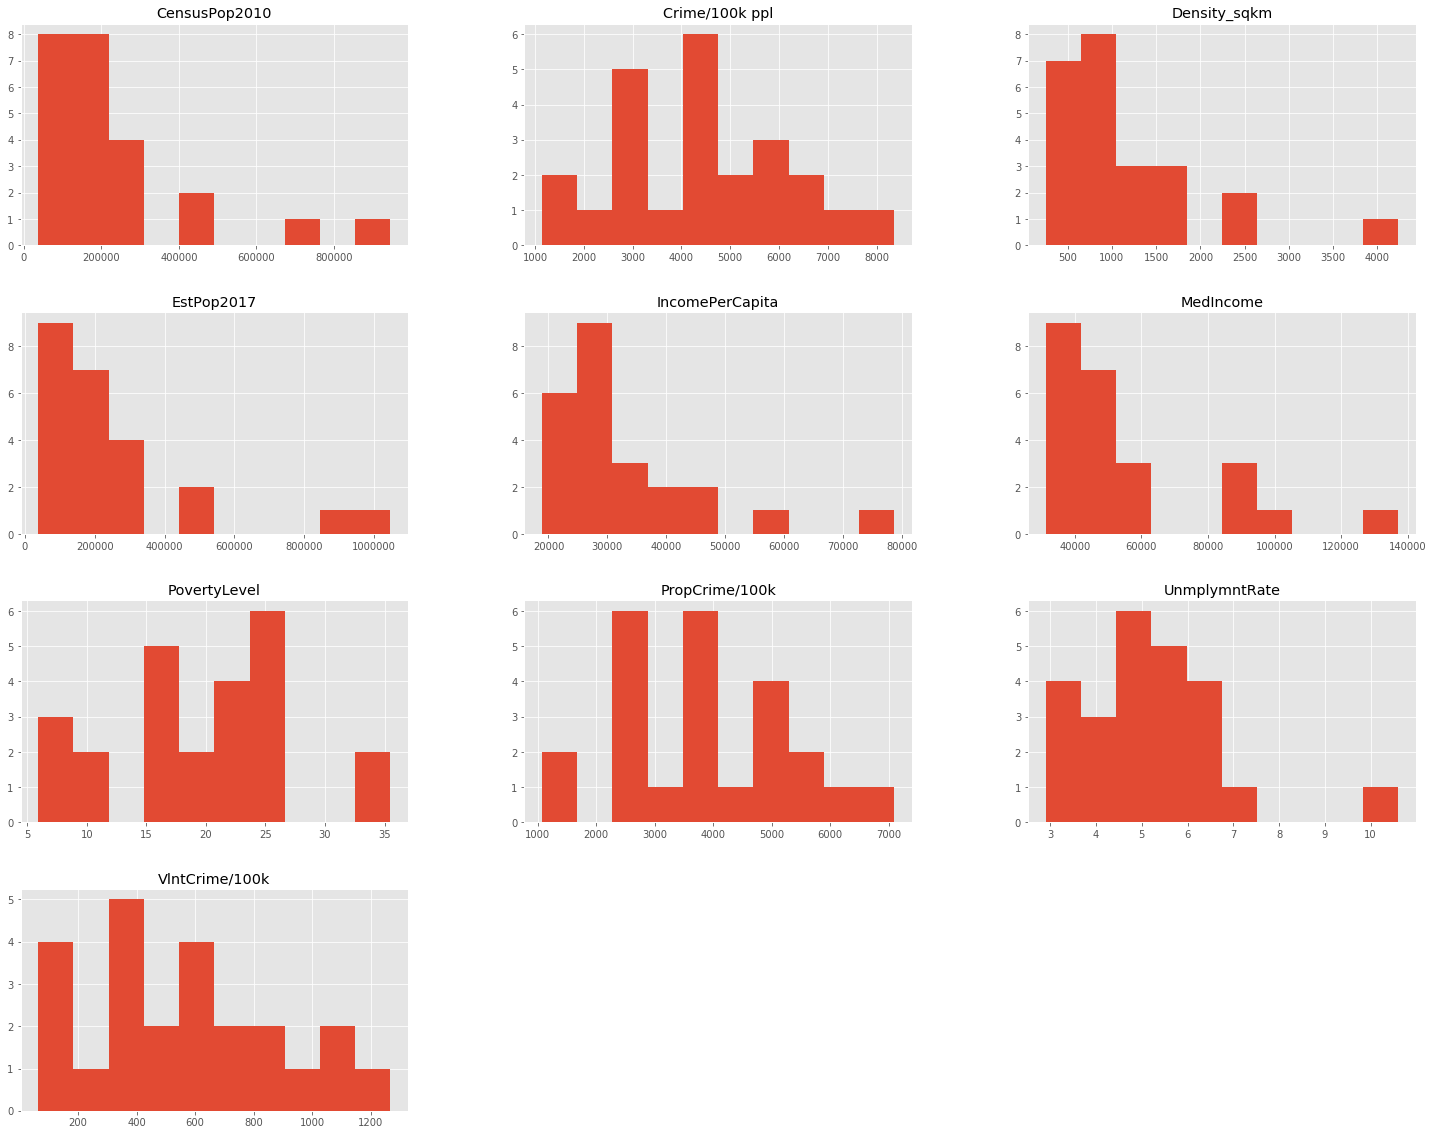

In [10]:
CityPltdata = City_data.drop('City',axis=1).drop('Latitude', axis=1).drop('Longitude', axis=1).astype(float)  # Create a new DataFrame by Dropping non-numeric cloumns, converting str values to floats
# Create a matplotlib figure and use the hist function to plot DataFrame Histograms 
fig = plt.figure(figsize = (25,20))
ax1 = fig.gca()
CityPltdata.hist(ax = ax1)
plt.show()

**Correlation Plot Heatmap demographic variables:** Visualize demographic variable relationships <br/>
Note: 

AxesSubplot(0.125,0.125;0.62x0.755)


,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel
EstPop2017,1.000000,0.998292,0.266931,-0.198138,-0.033326,-0.231271,0.043331,0.131183,0.055518,-0.201292
CensusPop2010,0.998292,1.000000,0.264036,-0.184630,-0.025009,-0.216843,0.026611,0.121073,0.069884,-0.184312
Density_sqkm,0.266931,0.264036,1.000000,-0.518309,-0.433457,-0.528034,0.520562,0.533782,-0.376712,-0.534593
Crime/100k ppl,-0.198138,-0.184630,-0.518309,1.000000,0.935123,0.996891,-0.548728,-0.619903,0.554813,0.538408
VlntCrime/100k,-0.033326,-0.025009,-0.433457,0.935123,1.000000,0.904295,-0.544406,-0.624186,0.606297,0.526466
PropCrime/100k,-0.231271,-0.216843,-0.528034,0.996891,0.904295,1.000000,-0.540060,-0.608061,0.533595,0.531599
IncomePerCapita,0.043331,0.026611,0.520562,-0.548728,-0.544406,-0.540060,1.000000,0.934931,-0.593815,-0.786832
MedIncome,0.131183,0.121073,0.533782,-0.619903,-0.624186,-0.608061,0.934931,1.000000,-0.610639,-0.860794
UnmplymntRate,0.055518,0.069884,-0.376712,0.554813,0.606297,0.533595,-0.593815,-0.610639,1.000000,0.729456
PovertyLevel,-0.201292,-0.184312,-0.534593,0.538408,0.526466,0.531599,-0.786832,-0.860794,0.729456,1.000000


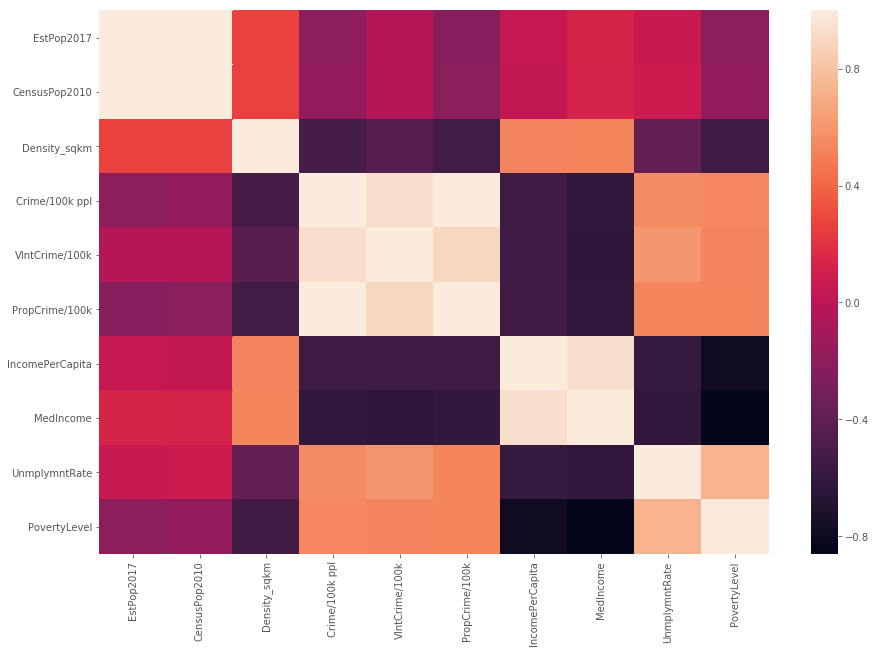

In [11]:
corr = CityPltdata.corr() # create a DataFrame with correlation variables 
fig, ax = plt.subplots(figsize=(15,10)) # Plot and print the Correlation DataFame Heatmap
print(sns.heatmap(corr, ax=ax))
corr #display Corrlation DataFrame

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


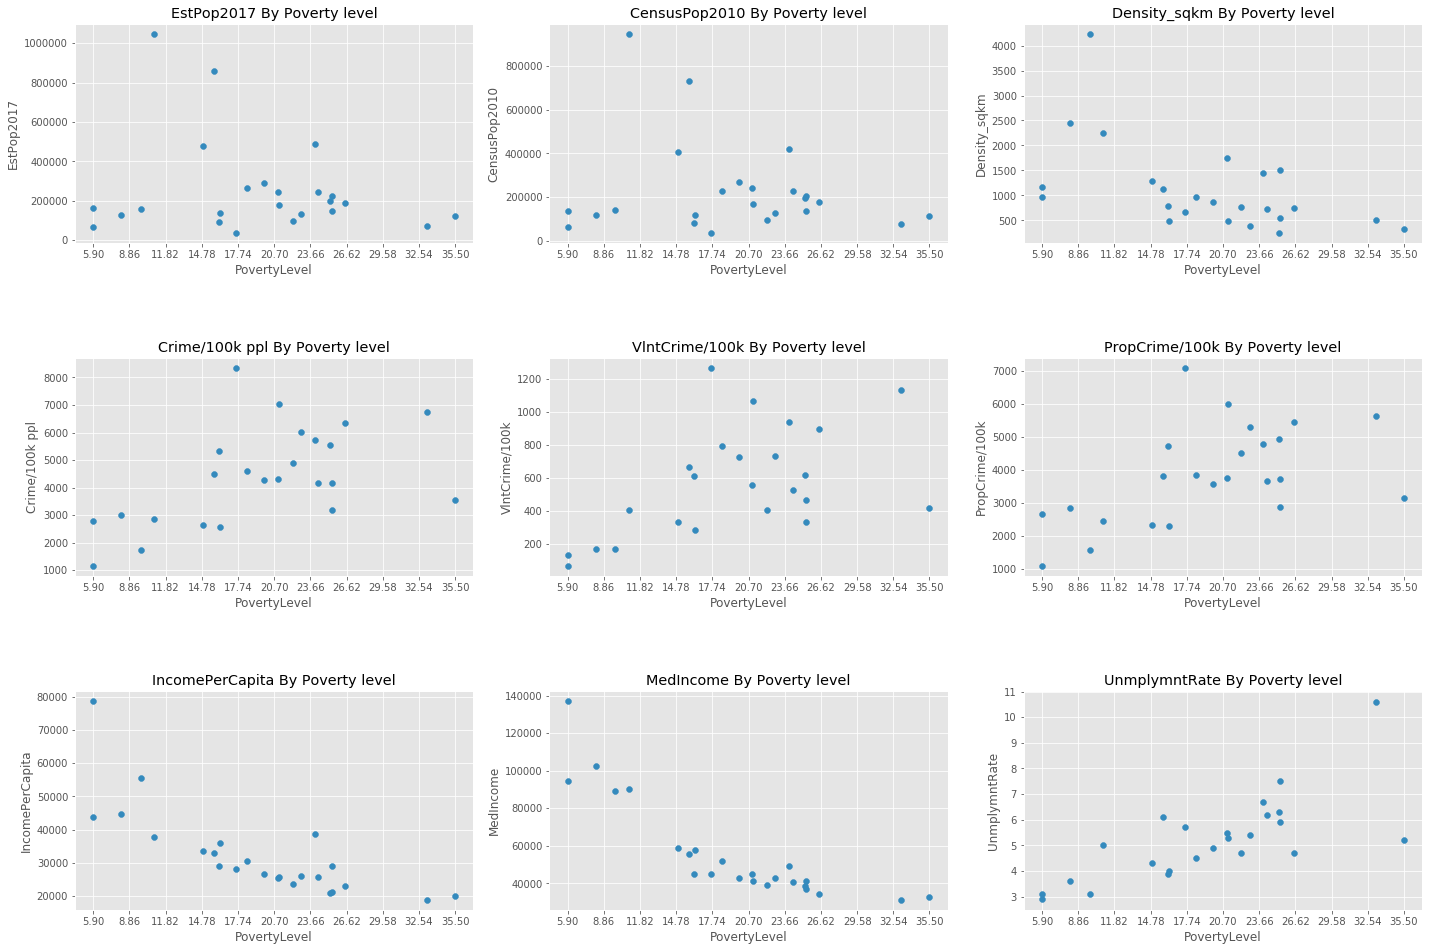

In [12]:
count, bin_edges = np.histogram(CityPltdata[CityPltdata.columns[9]])
fig = plt.figure(figsize=(20, 20))

#plt.subplots_adjust(bottom=0.2, top=0.7, hspace=0)
outer = gridspec.GridSpec(4, 3)
#print(outer)
for i in range(len(CityPltdata.columns)-1):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i])
    
    for j in range(1):
        ax = plt.Subplot(fig, inner[j])
        CityPltdata.plot.scatter(CityPltdata.columns[9], y = CityPltdata.columns[i], s=35, ax=ax)
        ax.set_title(CityPltdata.columns[i] + ' By Poverty level')
        #ax.yaxis.grid(True)
        ax.set_xticks(bin_edges)
        #ax.set_yticks([])        
        fig.add_subplot(ax)

fig.tight_layout()
fig.show()

#### Capturing & Compiling City Venue Data
----------------------

In [11]:
CLIENT_ID = 'FZ0Z0YM0DPOCVU0LCEA5DXTYEPGDQCSRGFGM2C0HF34IRVVM' # your Foursquare ID
CLIENT_SECRET = '4DPTY5IYM5SXDPGAXOYP3APLCXCLNY4EWSKTAZNVYPSHXL1T' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZ0Z0YM0DPOCVU0LCEA5DXTYEPGDQCSRGFGM2C0HF34IRVVM
CLIENT_SECRET:4DPTY5IYM5SXDPGAXOYP3APLCXCLNY4EWSKTAZNVYPSHXL1T


<br/>

##### Define a function that makes individual FourSquare API calls 
Returned data is lodaded into a dataframe **"nearby_venues"** and includes:
- **City:** 
- **City Coordinates:** 
- **Venue:** Venue Name - FourSquare API
- **Venue Coordinate:** Latitude/Longitude - FourSquare API
- **Venue Category:** Type of Venue - FourSquare API


In [12]:
def FourSquareNearbyVenues(names, latitudes, longitudes, radius=5000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns =  ['City', 'City Latitude', 'City Longitude',  'Venue', 
                  'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

##### Call the defined FourSquareNearbyVenues for all citiy Latitude and Longitude values
<br/>
Display the shape of the retuned values in a dataframe (2400 rows and 7 columns) and show an example of the returned results. <br/>
("nearby_venues"  dataframe shape and the first five rows as a sample of the dataframe.)

In [14]:
city_venues = FourSquareNearbyVenues(names=City_data['City'],latitudes=City_data['Latitude'],longitudes=City_data['Longitude'])
print(city_venues.shape)
city_venues.head()

(2400, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,San Jose,37.333,-121.900,SAP Center at San Jose,37.332600,-121.901387,Hockey Arena
1,San Jose,37.333,-121.900,Whole Foods Market,37.332086,-121.904623,Grocery Store
2,San Jose,37.333,-121.900,Henry's Hi-Life,37.335405,-121.898080,BBQ Joint
3,San Jose,37.333,-121.900,Poor House Bistro,37.329650,-121.900431,Cajun / Creole Restaurant
4,San Jose,37.333,-121.900,San Pedro Square Market,37.336480,-121.894403,Food Court


#### Preprocessing Venue & Demographic data for Clustering
---------------
Create a new DataFrame **"onehot"** that is populated with onehot encoding for each Venue Category <br/>

<br/>
Group "onehot" DataFrame by "City" cloumn <br/>
Provide the mean value for each Venue Category. Creates new "venNorm" data-frame<br/> 
Note: This compiles and normalizes all venue category data provided by FourSquare <br/>

###### Note: **"venNorm"** DataFrame aloows for Normalized Venue Information to be joined with Normalized Demographic information for Clustering. ####### 

In [15]:
onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="") # one hot encoding of ForuSquare Venues Data
onehot['City'] = city_venues['City'] # add cityname column back to dataframe
print("onehot shape:", onehot.shape)
venNorm = onehot.groupby('City').mean().reset_index()
print("venNorm shape:", venNorm.shape)
venNorm.head()

onehot shape: (2400, 278)
venNorm shape: (24, 278)


,City,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Basketball Court,College Bookstore,College Gym,College Quad,College Soccer Field,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Roller Rink,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Travel & Transport,Turkish Restaurant,University,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Albany,0.0,0.0

##### Create Selected Features  #####
---------

- Create "Growth Rate" Variable: (Estimate Poplutaion - 2010 Census Population)/Estimate Poplutaion 
- Drop Estimate Population, 2010 Census Population, Crime Per 100k people

Display Selected Features are saved as **"featData"**

In [17]:
featData = CityPltdata
featData['GrowthRate'] = ((featData['EstPop2017']-featData['CensusPop2010'])/featData['EstPop2017'])
featData = featData.drop('Crime/100k ppl', axis=1).drop('EstPop2017', axis=1).drop('CensusPop2010', axis=1)

featData

,Density_sqkm,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,GrowthRate
0,2248.0,404.0,2441.0,37845.0,90303.0,5.0,10.9,0.096490
1,964.0,133.0,2644.0,78721.0,137043.0,3.1,5.9,0.039105
2,2443.0,168.0,2837.0,44843.0,102533.0,3.6,8.2,0.075269
3,1293.0,333.0,2325.0,33682.0,58641.0,4.3,14.9,0.157386
4,1121.0,663.0,3815.0,33050.0,55599.0,6.1,15.8,0.148552
5,1450.0,936.0,4776.0,38686.0,49398.0,6.7,24.0,0.136312
6,496.0,284.0,2297.0,35948.0,57603.0,4.0,16.3,0.130060
7,720.0,523.0,3656.0,25852.0,40898.0,6.2,24.3,0.061274
8,253.0,616.0,4938.0,20876.0,38458.0,6.3,25.3,0.006705
9,387.0,734.0,5286.0,25990.0,42875.0,5.4,22.9,0.028862


Scale Feautre Selected Demographic Data
--------------------------
------------------
Use the **MinMaxScaler** function to scale Demographic data <br/>
Create a DataFrame **"CityScale"** with the Sacled Demographic data <br/>
 **Maximum cloumn values** = 1, **Minimum column values** = 0, with all inbetween values scaled to that standard 
 <br/>
 **"CityScale"** DataFrame provides Demogrpahic Data in a Normalized state to be Joined with **"veNorm"** 

In [19]:
x = featData.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
CityScale = pd.DataFrame(x_scaled)
CityScale['City'] = City_data['City']
cols = CityScale.columns.tolist()
cols = cols[-1:] + cols[:-1]

CityScale = CityScale[cols]
CityScale.columns = [CityScale.columns[0]] + featData.columns.tolist()[0:]
CityScale.head()

,City,Density_sqkm,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,GrowthRate
0,San Jose,0.501256,0.282627,0.226910,0.316843,0.558140,0.272727,0.168919,0.622477
1,Palo Alto,0.178643,0.057357,0.260631,1.000000,1.000000,0.025974,0.000000,0.377339
2,Santa Clara,0.550251,0.086451,0.292691,0.433800,0.673757,0.090909,0.077703,0.531824
3,Raleigh,0.261307,0.223608,0.207641,0.247267,0.258820,0.181818,0.304054,0.882610
4,Charlotte,0.218090,0.497922,0.455150,0.236705,0.230062,0.415584,0.334459,0.844872


Merge And Display DataFrame For Clustering
-------------
------------------------
Merge the Normalized **"CityScale"** DataFrame with the Normalized Demogrpahic Data in the **"venNorm"** DataFrame

In [73]:
citymerged = pd.merge(CityScale, venNorm, on='City')
citymerged

,City,Density_sqkm,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,GrowthRate,Accessories Store,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Capitol Building,Caribbean Restaurant,Cemetery,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Baseball Diamond,College Basketball Court,College Bookstore,College Gym,College Quad,College Soccer Field,College Theater,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Mongolian Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Roller Rink,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Fair,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Stadium,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Travel & Transport,Turkish Restaurant,University,Used Bookstore,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store

Run Kmeans Clustering Algorithm
------------------------
------------------
Set Desired Cluster Count with **kclusters** <br/>
Cluster Count = 3, Random State = 0 <br/>
Create a new DataFrame **"cityClustering"** by dropping the **"City"** Column from **"citymerged"** DataFrame <br/>
Run Kmeans Algorithm, store the information in the **"kmeans"** variable and display Label Results <br/>

In [80]:
kclusters = 3 # set number of clusters
cityClustering = citymerged.drop('City', axis=1) # Drop The City Column from merged DataFrame
#print(cityClustering)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cityClustering)  # run k-means clustering
kmeans.labels_  # Display generated cluster labels generated for each row in the dataframe

array([0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1,
       1], dtype=int32)

Interpret Clustering Results
-------------
------------------------
Define return most commn venues. 
Used to Sort Venue Categories  

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Use the **"return_most_common_venues"** function to build a DataFrame with the Top Most Venue Categories for each City. <br/>

**Rank & List onehot encoded varibales** <br>
Merge ranked City Venue dataframe with City Demographic Data "City_data" <br>
Add Cluster labels <br>
Save as **"ClusterResults"** dataframe <br>
Display **"ClusterResults"** <br>

In [81]:
num_top_venues = 20
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Cities_sorted = pd.DataFrame(columns=columns)
Cities_sorted['City'] = venNorm['City']

for ind in np.arange(venNorm.shape[0]):
    Cities_sorted.iloc[ind, 1:] = return_most_common_venues(venNorm.iloc[ind, :], num_top_venues)

ClusterResults = City_data.merge(Cities_sorted, how='left', on='City')
ClusterResults.insert(0, 'Cluster Labels', kmeans.labels_)
ClusterResults

,Cluster Labels,City,Latitude,Longitude,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,0,San Jose,37.333,-121.900,1046964,945942,2248,2844,404,2441,37845,90303,5.0,10.9,Mexican Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Theater,Pub,Bar,Vegetarian / Vegan Restaurant,Plaza,Pizza Place,Pet Store,Taco Place,Ethiopian Restaurant,Comedy Club,Art Gallery,German Restaurant,Ice Cream Shop,Wine Bar,Greek Restaurant,Grocery Store
1,0,Palo Alto,37.429,-122.138,67024,64403,964,2777,133,2644,78721,137043,3.1,5.9,Park,Coffee Shop,Gym / Fitness Center,Café,Pizza Place,Art Museum,Ice Cream Shop,Diner,Sandwich Place,Pool,Burger Joint,Mexican Restaurant,Sushi Restaurant,Monument / Landmark,Bubble Tea Shop,Bookstore,Spa,French Restaurant,Grocery Store,Gym
2,0,Santa Clara,37.354,-121.969,125948,116468,2443,3005,168,2837,44843,102533,3.6,8.2,Korean Restaurant,Pizza Place,Indian Restaurant,Japanese Restaurant,Grocery Store,Sandwich Place,Burger Joint,Gym / Fitness Center,Seafood Restaurant,Furniture / Home Store,Sushi Restaurant,Spa,Thai Restaurant,Ice Cream Shop,Bubble Tea Shop,Bookstore,Gym,American Restaurant,Ramen Restaurant,Mexican Restaurant
3,2,Raleigh,35.767,-78.633,479332,403892,1293,2657,333,2325,33682,58641,4.3,14.9,Brewery,Cocktail Bar,Coffee Shop,Music Venue,American Restaurant,Italian Restaurant,Burger Joint,Asian Restaurant,BBQ Joint,Lounge,Southern / Soul Food Restaurant,Ice Cream Shop,Mexican Restaurant,Bakery,Sushi Restaurant,Performing Arts Venue,Vegetarian / Vegan Restaurant,Beer Store,Seafood Restaurant,Gastropub
4,2,Charlotte,35.227,-80.8430,859035,731424,1121,4479,663,3815,33050,55599,6.1,15.8,Pizza Place,Park,American Restaurant,Theater,Hotel,Italian Restaurant,Steakhouse,BBQ Joint,Restaurant,Brewery,Beer Garden,New American Restaurant,Lounge,Thai Restaurant,Irish Pub,Performing Arts Venue,Art Gallery,Grocery Store,Gym,Coffee Shop
5,2,Atlanta,33.755,-84.3900,486290,420003,1450,5712,936,4776,38686,49398,6.7,24.0,Park,Trail,American Restaurant,Coffee Shop,Southern / Soul Food Restaurant,Breakfast Spot,Restaurant,Bar,Mediterranean Restaurant,Mexican Restaurant,History Museum,Dessert Shop,Café,Beer Bar,Ice Cream Shop,Market,Farmers Market,Donut Shop,Museum,Wine Bar
6,2,Charleston,32.783,-79.9333,138036,120083,496,2581,284,2297,35948,57603,4.0,16.3,Seafood Restaurant,Hotel,Southern / Soul Food Restaurant,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Steakhouse,Park,Cocktail Bar,Boutique,New American Restaurant,Bed & Breakfast,Pizza Place,Breakfast Spot,Restaurant,Theater,Museum,Church,Pub
7,2,Winston Salem,36.102,-80.2604,244605,229617,720,4179,523,3656,25852,40898,6.2,24.3,Bar,American Restaurant,Pizza Place,Grocery Store,Bakery,Brewery,Park,Burger Joint,Dessert Shop,Mediterranean Restaurant,Coffee Shop,Hotel,Wine Bar,Southern / Soul Food Restaurant,Theater,Breakfast Spot,Supermarket,BBQ Joint,Fast Food Restaurant,Food & Drink Shop
8,1,Augusta,33.467,-81.967,197166,195844,253,5555,616,4938,20876,38458,6.3,25.3,American Restaurant,Sandwich Place,Discount Store,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Coffee Shop,Restaurant,Trail,BBQ Joint,Burger Joint,Liquor Store,Japanese Restaurant,Seafood Restaurant,Hotel,Bar,Plaza,Deli / Bodega,Grocery Store,Performing Arts Venue
9,1,Columbia,34.000,-81.0347,133114,129272,387,6020,734,5286,25990,42875,5.4,22.9,American Restaurant,Coffee Shop,Bar,Sandwich Place,Wine Bar,Deli / Bodega,Seafood Restaurant,Dessert Shop,Burger Joint,

Plot the Kmeans Clustering Algorithm Results to Map
------------------------
--------------
Use the Folium libraray to plot the **"results"** datframe showing which citys were grouped together <br>
Map Centered on the South Eastern Region of the United States

In [89]:
map_clusters = folium.Map(location=[36.102, -80.2604], zoom_start=7, tiles='Mapbox Bright')
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(.0, .6, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ClusterResults['Latitude'], ClusterResults['Longitude'], ClusterResults['City'], ClusterResults['Cluster Labels']):
    label = folium.Popup("<b>City Name: </b>"+ str(poi) + 
                         "<br>Assigned Cluster Group:" + "<b>" + str(cluster) +  "</b>" +
                         "<br>Target Cluster Group: " +  "<b>" + str(ClusterResults['Cluster Labels'][0])+ "</b>")
    #print(rainbow[cluster-1])
    folium.CircleMarker(
        [float(lat), float(lon)],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        line_color='#ffffff',
        fill=True,
        fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)

map_clusters

Display Cities Clustered with Target by K-Means
------------------------
--------------

In [70]:
TargetGrp = ClusterResults[ClusterResults['Cluster Labels'] == 0]
TargetGrp

,Cluster Labels,City,Latitude,Longitude,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,0,San Jose,37.333,-121.900,1046964,945942,2248,2844,404,2441,37845,90303,5.0,10.9,Mexican Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Theater,Pub,Bar,Vegetarian / Vegan Restaurant,Plaza,Pizza Place,Pet Store,Taco Place,Ethiopian Restaurant,Comedy Club,Art Gallery,German Restaurant,Ice Cream Shop,Wine Bar,Greek Restaurant,Grocery Store
1,0,Palo Alto,37.429,-122.138,67024,64403,964,2777,133,2644,78721,137043,3.1,5.9,Park,Coffee Shop,Gym / Fitness Center,Café,Pizza Place,Art Museum,Ice Cream Shop,Diner,Sandwich Place,Pool,Burger Joint,Mexican Restaurant,Sushi Restaurant,Monument / Landmark,Bubble Tea Shop,Bookstore,Spa,French Restaurant,Grocery Store,Gym
2,0,Santa Clara,37.354,-121.969,125948,116468,2443,3005,168,2837,44843,102533,3.6,8.2,Korean Restaurant,Pizza Place,Indian Restaurant,Japanese Restaurant,Grocery Store,Sandwich Place,Burger Joint,Gym / Fitness Center,Seafood Restaurant,Furniture / Home Store,Sushi Restaurant,Spa,Thai Restaurant,Ice Cream Shop,Bubble Tea Shop,Bookstore,Gym,American Restaurant,Ramen Restaurant,Mexican Restaurant
13,0,Alexandria,38.804,-77.0472,160035,139966,4233,1734,166,1568,55534,89200,3.1,9.8,American Restaurant,Park,Pizza Place,Italian Restaurant,Ice Cream Shop,New American Restaurant,Coffee Shop,French Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Bakery,Grocery Store,Lounge,Cupcake Shop,Speakeasy,Furniture / Home Store,Restaurant,Wine Bar,Portuguese Restaurant
20,0,Cary,35.791,-78.7811,165904,135234,1164,1139,64,1075,43925,94617,2.9,5.9,Gym / Fitness Center,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,American Restaurant,Spa,Bakery,Hotel,Japanese Restaurant,Supermarket,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Trail,Park,South Indian Restaurant,Mediterranean Restaurant,Sandwich Place,Breakfast Spot


Display K-Means groupings At 2 & 4 clusters
-------------
------------------------
Help to review Cluster size impact on clustering results.


**n_clusters = 2**
----------

In [88]:
kclusters1 = 2 # set number of clusters
cityClustering1 = citymerged.drop('City', axis=1) # Drop The City Column from merged DataFrame
kmeans1 = KMeans(n_clusters=kclusters1, random_state=0).fit(cityClustering1)  # run k-means clustering
print(list(kmeans1.labels_))

TargetGrp1 = ClusterResults.drop('Cluster Labels', axis=1)
TargetGrp1.insert(0, 'Cluster Labels', kmeans1.labels_)
TargetGrp1[TargetGrp1['Cluster Labels'] == kmeans1.labels_[0]]

[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


,Cluster Labels,City,Latitude,Longitude,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,1,San Jose,37.333,-121.900,1046964,945942,2248,2844,404,2441,37845,90303,5.0,10.9,Mexican Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Theater,Pub,Bar,Vegetarian / Vegan Restaurant,Plaza,Pizza Place,Pet Store,Taco Place,Ethiopian Restaurant,Comedy Club,Art Gallery,German Restaurant,Ice Cream Shop,Wine Bar,Greek Restaurant,Grocery Store
1,1,Palo Alto,37.429,-122.138,67024,64403,964,2777,133,2644,78721,137043,3.1,5.9,Park,Coffee Shop,Gym / Fitness Center,Café,Pizza Place,Art Museum,Ice Cream Shop,Diner,Sandwich Place,Pool,Burger Joint,Mexican Restaurant,Sushi Restaurant,Monument / Landmark,Bubble Tea Shop,Bookstore,Spa,French Restaurant,Grocery Store,Gym
2,1,Santa Clara,37.354,-121.969,125948,116468,2443,3005,168,2837,44843,102533,3.6,8.2,Korean Restaurant,Pizza Place,Indian Restaurant,Japanese Restaurant,Grocery Store,Sandwich Place,Burger Joint,Gym / Fitness Center,Seafood Restaurant,Furniture / Home Store,Sushi Restaurant,Spa,Thai Restaurant,Ice Cream Shop,Bubble Tea Shop,Bookstore,Gym,American Restaurant,Ramen Restaurant,Mexican Restaurant
3,1,Raleigh,35.767,-78.633,479332,403892,1293,2657,333,2325,33682,58641,4.3,14.9,Brewery,Cocktail Bar,Coffee Shop,Music Venue,American Restaurant,Italian Restaurant,Burger Joint,Asian Restaurant,BBQ Joint,Lounge,Southern / Soul Food Restaurant,Ice Cream Shop,Mexican Restaurant,Bakery,Sushi Restaurant,Performing Arts Venue,Vegetarian / Vegan Restaurant,Beer Store,Seafood Restaurant,Gastropub
6,1,Charleston,32.783,-79.9333,138036,120083,496,2581,284,2297,35948,57603,4.0,16.3,Seafood Restaurant,Hotel,Southern / Soul Food Restaurant,Coffee Shop,American Restaurant,Sandwich Place,Ice Cream Shop,Steakhouse,Park,Cocktail Bar,Boutique,New American Restaurant,Bed & Breakfast,Pizza Place,Breakfast Spot,Restaurant,Theater,Museum,Church,Pub
13,1,Alexandria,38.804,-77.0472,160035,139966,4233,1734,166,1568,55534,89200,3.1,9.8,American Restaurant,Park,Pizza Place,Italian Restaurant,Ice Cream Shop,New American Restaurant,Coffee Shop,French Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Bakery,Grocery Store,Lounge,Cupcake Shop,Speakeasy,Furniture / Home Store,Restaurant,Wine Bar,Portuguese Restaurant
20,1,Cary,35.791,-78.7811,165904,135234,1164,1139,64,1075,43925,94617,2.9,5.9,Gym / Fitness Center,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,American Restaurant,Spa,Bakery,Hotel,Japanese Restaurant,Supermarket,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Trail,Park,South Indian Restaurant,Mediterranean Restaurant,Sandwich Place,Breakfast Spot


**n_clusters = 4**
----------

In [87]:
kclusters2 = 4 # set number of clusters
cityClustering2 = citymerged.drop('City', axis=1) # Drop The City Column from merged DataFrame
kmeans2 = KMeans(n_clusters=kclusters2, random_state=0).fit(cityClustering2)  # run k-means clustering
print(list(kmeans2.labels_))

TargetGrp2 = ClusterResults.drop('Cluster Labels', axis=1)
TargetGrp2.insert(0, 'Cluster Labels', kmeans2.labels_)
TargetGrp2[TargetGrp2['Cluster Labels'] == kmeans2.labels_[0]]

[0, 0, 0, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 0, 2, 1, 3, 1, 2, 1, 0, 1, 2, 2]


,Cluster Labels,City,Latitude,Longitude,EstPop2017,CensusPop2010,Density_sqkm,Crime/100k ppl,VlntCrime/100k,PropCrime/100k,IncomePerCapita,MedIncome,UnmplymntRate,PovertyLevel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,0,San Jose,37.333,-121.900,1046964,945942,2248,2844,404,2441,37845,90303,5.0,10.9,Mexican Restaurant,Coffee Shop,Cocktail Bar,Sandwich Place,Theater,Pub,Bar,Vegetarian / Vegan Restaurant,Plaza,Pizza Place,Pet Store,Taco Place,Ethiopian Restaurant,Comedy Club,Art Gallery,German Restaurant,Ice Cream Shop,Wine Bar,Greek Restaurant,Grocery Store
1,0,Palo Alto,37.429,-122.138,67024,64403,964,2777,133,2644,78721,137043,3.1,5.9,Park,Coffee Shop,Gym / Fitness Center,Café,Pizza Place,Art Museum,Ice Cream Shop,Diner,Sandwich Place,Pool,Burger Joint,Mexican Restaurant,Sushi Restaurant,Monument / Landmark,Bubble Tea Shop,Bookstore,Spa,French Restaurant,Grocery Store,Gym
2,0,Santa Clara,37.354,-121.969,125948,116468,2443,3005,168,2837,44843,102533,3.6,8.2,Korean Restaurant,Pizza Place,Indian Restaurant,Japanese Restaurant,Grocery Store,Sandwich Place,Burger Joint,Gym / Fitness Center,Seafood Restaurant,Furniture / Home Store,Sushi Restaurant,Spa,Thai Restaurant,Ice Cream Shop,Bubble Tea Shop,Bookstore,Gym,American Restaurant,Ramen Restaurant,Mexican Restaurant
13,0,Alexandria,38.804,-77.0472,160035,139966,4233,1734,166,1568,55534,89200,3.1,9.8,American Restaurant,Park,Pizza Place,Italian Restaurant,Ice Cream Shop,New American Restaurant,Coffee Shop,French Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Bakery,Grocery Store,Lounge,Cupcake Shop,Speakeasy,Furniture / Home Store,Restaurant,Wine Bar,Portuguese Restaurant
20,0,Cary,35.791,-78.7811,165904,135234,1164,1139,64,1075,43925,94617,2.9,5.9,Gym / Fitness Center,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,American Restaurant,Spa,Bakery,Hotel,Japanese Restaurant,Supermarket,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Trail,Park,South Indian Restaurant,Mediterranean Restaurant,Sandwich Place,Breakfast Spot
